# Analyzing the effect of weather on policing

## Exploring the weather dataset

The weather data you'll be using was collected by the National Centers for Environmental Information. 

Our hypothesis is that weather conditions impact police behavior during traffic stops.

In [1]:
import pandas as pd
weather = pd.read_csv('/work/data_science_notes/ 23. Analyzing police activity with pandas/data/weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


### Plotting the temperature

In [2]:
# Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


<AxesSubplot:>

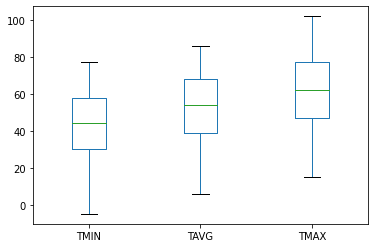

In [3]:
# Create a box plot to visualize the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

### Plotting the temperature difference

In [4]:
# Create a new column named TDIFF that represents the difference between the maximum and minimum temperatures
weather['TDIFF'] = weather['TMAX'] - weather['TMIN'] 

In [5]:
# Print the summary statistics for TDIFF
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

<AxesSubplot:>

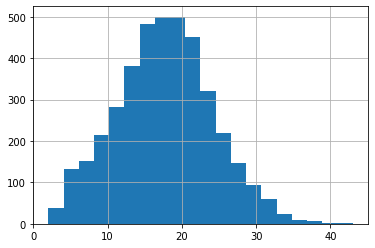

In [6]:
# Create a histogram with 20 bins to visualize TDIFF
weather['TDIFF'].hist(bins=20)

## Categorizing the weather

### Counting bad weather conditions

In [7]:
# The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition
# Copy the columns WT01 through WT22 from weather to a new DataFrame named WT
WT = weather.loc[:, 'WT01':'WT22']

In [8]:
# Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions
weather['bad_conditions'] = WT.sum(axis='columns')

In [9]:
# Replace any missing values in bad_conditions with a 0
weather.bad_conditions.fillna(0)

0       2.0
1       2.0
2       3.0
3       4.0
4       4.0
       ... 
4012    1.0
4013    0.0
4014    3.0
4015    2.0
4016    1.0
Name: bad_conditions, Length: 4017, dtype: float64

<AxesSubplot:>

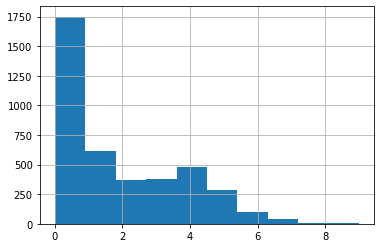

In [10]:
# Create a histogram to visualize bad_conditions
weather.bad_conditions.hist()

### Rating the weather conditions

In [11]:
# In this exercise, you'll use the counts to create a rating system for the weather
# Count the unique values in the bad_conditions column and sort the index
weather.bad_conditions.value_counts().sort_index()

0.0    1749
1.0     613
2.0     367
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [12]:
# Create a dictionary called mapping that maps the bad_conditions integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [13]:
# Convert the bad_conditions integers to strings using the mapping and store the results in a new column called rating
weather['rating'] = weather.bad_conditions.map(mapping)

In [14]:
# Count the unique values in rating to verify that the integers were properly converted to strings
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

### Changing the data type to category

In [15]:
# Create a CategoricalDtype object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

In [16]:
# Use the cats object to change the data type of the rating column from object to category
weather.rating = weather.rating.astype(cats)

In [17]:
# Examine the head of the rating column to confirm that the categories are logically ordered
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

## Merging datasets

### Preparing the DataFrames

In [18]:
# Reset the index of the ri DataFrame
ri = pd.read_csv('/work/data_science_notes/ 23. Analyzing police activity with pandas/data/police_edited.csv')
ri.stop_datetime = pd.to_datetime(ri.stop_datetime)
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [19]:
# Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame
weather_rating = weather[['DATE', 'rating']]
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


### Merging the DataFrames

In [20]:
# Examine the shape of the ri DataFrame
ri.shape

(86536, 14)

In [21]:
# Merge the ri and weather_rating DataFrames using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
ri_weather.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,DATE,rating
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04,bad
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23,worse
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17,good
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20,bad
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24,bad


In [22]:
ri_weather.isna().sum()

stop_datetime             0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
DATE                      0
rating                    0
dtype: int64

In [23]:
# Examine the shape of ri_weather to confirm that it has two more columns but the same number of rows as ri
ri_weather.shape

(86536, 16)

In [24]:
# Replace the index of ri_weather with the stop_datetime column
ri_weather = ri_weather.set_index('stop_datetime')

## Does weather affect the arrest rate?

### Comparing arrest rates by weather rating

In [25]:
# Calculate the overall arrest rate
ri_weather.is_arrested.mean()

0.0355690117407784

In [26]:
# Calculate the arrest rate for each weather rating using a .groupby()
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [32]:
# Calculate the arrest rate for each combination of violation and rating
# How do the arrest rates differ by group?
ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

### Selecting from a multi-indexed Series

In [34]:
# Save the output of the .groupby() operation from the last exercise as a new object, arrest_rate
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [35]:
# Print the arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation', 'bad']

0.05804964058049641

In [37]:
# Print the arrest rates for speeding violations in all three weather conditions
arrest_rate.loc['Speeding', :]

violation  rating
Speeding   good      0.013405
           bad       0.013314
           worse     0.016886
Name: is_arrested, dtype: float64

### Reshaping the arrest rate data

In [38]:
# Unstack the arrest_rate Series to reshape it into a DataFrame
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [39]:
# Create the exact same DataFrame using a pivot table! 
# Each of the three .pivot_table() parameters should be specified as one of the ri_weather columns
ri_weather.pivot_table(values='is_arrested', index='violation', columns='rating')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc001eea-22fe-4a27-852d-7fbece520334' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>